# Import Libraries and Files 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Embedding
from keras import Input
from keras import models
from keras import layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, SpatialDropout1D, Bidirectional, GlobalMaxPool1D
from tensorflow.keras import backend as K
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## For Stats Model

In [ ]:
#Import the files for Stats
## Removed Validation 
#A
a_stats_train_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_train_a.csv', delimiter = ",")
a_stats_train_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_train_a.csv', delimiter = ",")
a_stats_valid_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_valid_a.csv', delimiter = ",")
a_stats_valid_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_valid_a.csv', delimiter = ",")
a_stats_test_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_test_a.csv', delimiter = ",")
a_stats_test_y =np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_test_a.csv', delimiter = ",")

#B
b_stats_train_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_train_b.csv', delimiter = ",")
b_stats_train_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_train_b.csv', delimiter = ",")
b_stats_valid_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_valid_b.csv', delimiter = ",")
b_stats_valid_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_valid_b.csv', delimiter = ",")
b_stats_test_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_test_b.csv', delimiter = ",")
b_stats_test_y =np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_test_b.csv', delimiter = ",")

#C
c_stats_train_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_train_c.csv', delimiter = ",")
c_stats_train_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_train_c.csv', delimiter = ",")
c_stats_valid_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_valid_c.csv', delimiter = ",")
c_stats_valid_y = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_valid_c.csv', delimiter = ",")
c_stats_test_x = np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/X_test_c.csv', delimiter = ",")
c_stats_test_y =np.genfromtxt('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/Stats/y_test_c.csv', delimiter = ",")

In [ ]:
a_stats_train_x.shape, a_stats_train_y.shape, a_stats_test_x.shape, a_stats_test_y.shape, b_stats_train_x.shape, b_stats_train_y.shape, a_stats_valid_x.shape, a_stats_valid_y.shape

((11916, 200),
 (11916,),
 (860, 200),
 (860,),
 (3960, 200),
 (3960,),
 (1324, 200),
 (1324,))

### For Cross Validation

In [ ]:
#Merge the training and validation data
#A
a_cv_train_x = np.concatenate((a_stats_train_x, a_stats_valid_x))
a_cv_train_y = np.concatenate((a_stats_train_y, a_stats_valid_y))
a_cv_test_x = a_stats_test_x
a_cv_test_y = a_stats_test_y

#B
b_cv_train_x = np.concatenate((b_stats_train_x, b_stats_valid_x))
b_cv_train_y = np.concatenate((b_stats_train_y, b_stats_valid_y))
b_cv_test_x = b_stats_test_x
b_cv_test_y = b_stats_test_y

#C
c_cv_train_x = np.concatenate((c_stats_train_x, c_stats_valid_x))
c_cv_train_y = np.concatenate((c_stats_train_y, c_stats_valid_y))
c_cv_test_x = c_stats_test_x
c_cv_test_y = c_stats_test_y

## Evaluation Function

In [ ]:
#Evaluation function 
def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred))
  
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

# A

#### SMOTE DATA

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

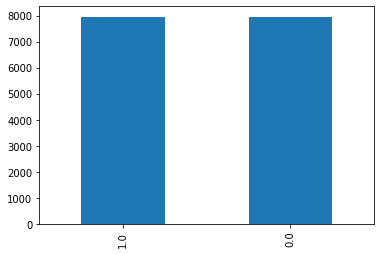

In [ ]:
#SMOTE (create the dataframe with the smote data)
# Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(a_stats_train_x, a_stats_train_y)
X_train_new_cv, y_train_new_cv = sm.fit_sample(a_cv_train_x, a_cv_train_y)

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

## Stats Models

In [ ]:
#Models 
'''
1. Logistic Regression 
  a. Basic (Balanced Class) 
  b. SMOTE 
  c. Grid Search 
2. SVM 
  a. Basic one (Balanced Class ) 
    i. Noor's many many methods  
  b. SMOTE 
  c. Grid Search 
2. SVM 
  a. Basic one (Balanced Class)
  b. SMOTE 
  c. Grid Search 
3. GNB 
  a. Basic one
  b. SMOTE
4. Random Forest Classifier 
  a. Basic (Balanced Class)
  b. SMOTE 
5. Gradient Boosting 
  a. Basic 
  b. SMOTE 
6. ADA Boost 
  a. Basic 
  b. SMOTE
7. XG BOOST
  a. Basic 
  b. SMOTE w Grid Search
'''

"\n1. Logistic Regression \n  a. Basic (Balanced Class) \n  b. SMOTE \n  c. Grid Search \n2. SVM \n  a. Basic one (Balanced Class ) \n    i. Noor's many many methods  \n  b. SMOTE \n  c. Grid Search \n2. SVM \n  a. Basic one (Balanced Class)\n  b. SMOTE \n  c. Grid Search \n3. GNB \n  a. Basic one\n  b. SMOTE\n4. Random Forest Classifier \n  a. Basic (Balanced Class)\n  b. SMOTE \n5. Gradient Boosting \n  a. Basic \n  b. SMOTE \n6. ADA Boost \n  a. Basic \n  b. SMOTE\n7. XG BOOST\n  a. Basic \n  b. SMOTE w Grid Search\n"

### Logistic Regression

#### Basic (Balanced Class)

AUC is:  0.5877262443438914
              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69       884
         1.0       0.43      0.53      0.47       440

    accuracy                           0.61      1324
   macro avg       0.58      0.59      0.58      1324
weighted avg       0.63      0.61      0.62      1324

Confusion Matrix: 
 [[575 309]
 [209 231]]


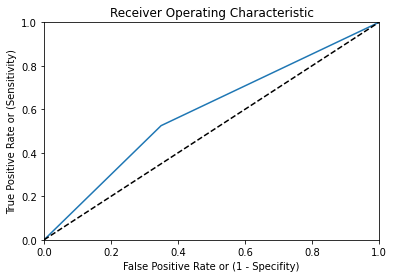

In [ ]:
# Balanced Weights
# LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score, classification_report
import pickle

model = LogisticRegression(max_iter=100000, class_weight='balanced', solver='newton-cg')
model.fit(a_stats_train_x, a_stats_train_y)

y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5927447552447552
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81       884
         1.0       0.68      0.24      0.36       440

    accuracy                           0.71      1324
   macro avg       0.70      0.59      0.59      1324
weighted avg       0.70      0.71      0.66      1324

Confusion Matrix: 
 [[833  51]
 [333 107]]


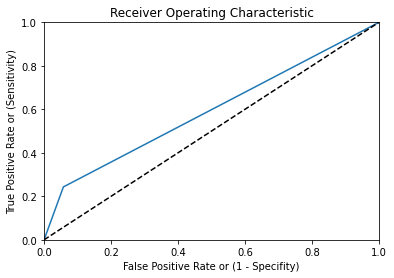

In [ ]:
# SMOTE
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'newton-cg')

# fit the model
clf.fit(a_stats_train_x, a_stats_train_y)


# prediction for Testing data
y_pred = clf.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### GridSearch (Without SMOTE)

In [ ]:
#GridSearch to find best weights -- WITHOUT SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
grid = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2)

grid.fit(a_stats_train_x, a_stats_train_y)

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.4min finished


Best score: 0.5127887115825616 with param: {'class_weight': {0: 0.18904522613065328, 1: 0.8109547738693468}}


AUC is:  0.5067667626491157
              precision    recall  f1-score   support

         0.0       0.83      0.02      0.04       884
         1.0       0.34      0.99      0.50       440

    accuracy                           0.34      1324
   macro avg       0.58      0.51      0.27      1324
weighted avg       0.67      0.34      0.20      1324

Confusion Matrix: 
 [[ 20 864]
 [  4 436]]


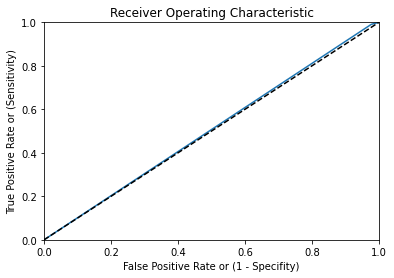

In [ ]:
# Using the manual class weight -- WITHOUT SMOTE
model = LogisticRegression(max_iter=100000, class_weight={0: 0.099, 1:0.900}, solver='newton-cg')
model.fit(a_stats_train_x, a_stats_train_y) # Training the model
y_pred = model.predict(a_stats_valid_x) # Predicting labels for our test set using trained model

evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
print(cross_val_score(logreg, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.609388095892164


### SVM

#### Basic (Balanced Class)

AUC is:  0.591058206499383
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.71       884
         1.0       0.44      0.50      0.47       440

    accuracy                           0.62      1324
   macro avg       0.59      0.59      0.59      1324
weighted avg       0.64      0.62      0.63      1324

Confusion Matrix: 
 [[605 279]
 [221 219]]


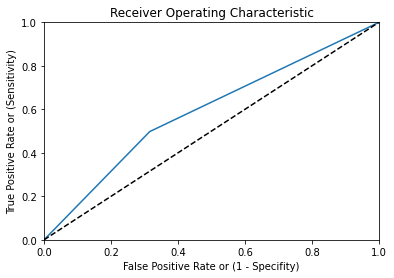

In [ ]:
# SVM with weights -- LINEAR
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='linear', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(a_stats_train_x, a_stats_train_y)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.6006941587823941
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72       884
         1.0       0.45      0.51      0.48       440

    accuracy                           0.63      1324
   macro avg       0.60      0.60      0.60      1324
weighted avg       0.64      0.63      0.64      1324

Confusion Matrix: 
 [[614 270]
 [217 223]]


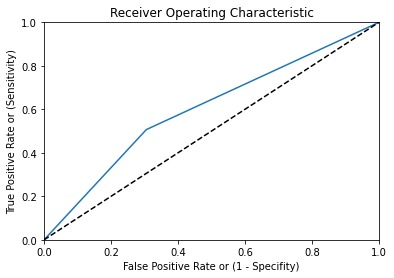

In [ ]:
# SVM with weights -- RBF
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='rbf', random_state=0, class_weight = 'balanced')

# Train classifier
model = svc.fit(a_stats_train_x, a_stats_train_y)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.6007044426162074
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71       884
         1.0       0.45      0.51      0.48       440

    accuracy                           0.63      1324
   macro avg       0.60      0.60      0.60      1324
weighted avg       0.64      0.63      0.64      1324

Confusion Matrix: 
 [[610 274]
 [215 225]]


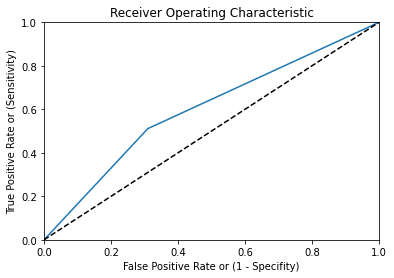

In [ ]:
# SVM with weights -- POLY
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='poly', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(a_stats_train_x, a_stats_train_y)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.5339366515837104
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63       884
         1.0       0.37      0.50      0.42       440

    accuracy                           0.55      1324
   macro avg       0.53      0.53      0.52      1324
weighted avg       0.59      0.55      0.56      1324

Confusion Matrix: 
 [[502 382]
 [220 220]]


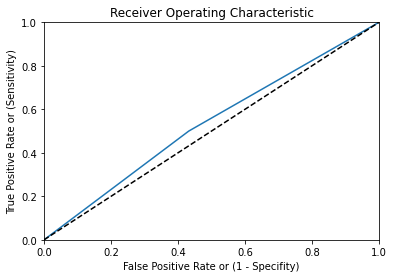

In [ ]:
# SVM with weights -- SIGMOID
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='sigmoid', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(a_stats_train_x, a_stats_train_y)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5780697243932539
              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69       884
         1.0       0.42      0.51      0.46       440

    accuracy                           0.60      1324
   macro avg       0.57      0.58      0.57      1324
weighted avg       0.62      0.60      0.61      1324

Confusion Matrix: 
 [[574 310]
 [217 223]]


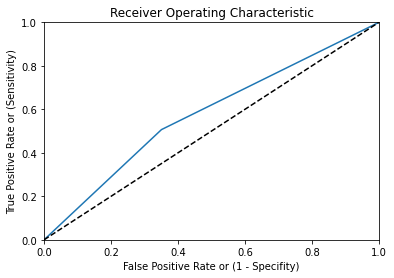

In [ ]:
# SMOTE
# SVM -- LINEAR
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='linear', random_state=0)

# Train classifier
model = svc.fit(X_train_new, y_train_new)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.5921380090497738
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       884
         1.0       0.45      0.47      0.46       440

    accuracy                           0.63      1324
   macro avg       0.59      0.59      0.59      1324
weighted avg       0.64      0.63      0.63      1324

Confusion Matrix: 
 [[627 257]
 [231 209]]


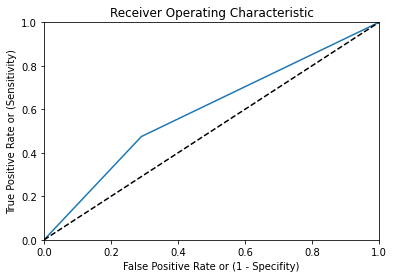

In [ ]:
# SMOTE
# SVM -- RBF
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(X_train_new, y_train_new)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.588944878650761
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       884
         1.0       0.42      0.56      0.48       440

    accuracy                           0.60      1324
   macro avg       0.58      0.59      0.58      1324
weighted avg       0.63      0.60      0.61      1324

Confusion Matrix: 
 [[543 341]
 [192 248]]


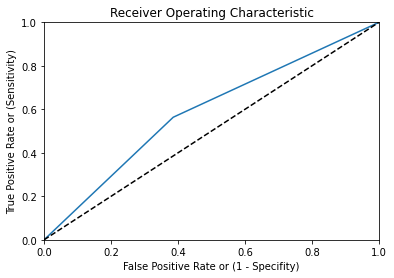

In [ ]:
# SMOTE
# SVM -- POLY
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='poly', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(X_train_new, y_train_new)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

AUC is:  0.5436497326203209
              precision    recall  f1-score   support

         0.0       0.71      0.54      0.61       884
         1.0       0.37      0.54      0.44       440

    accuracy                           0.54      1324
   macro avg       0.54      0.54      0.53      1324
weighted avg       0.59      0.54      0.56      1324

Confusion Matrix: 
 [[481 403]
 [201 239]]


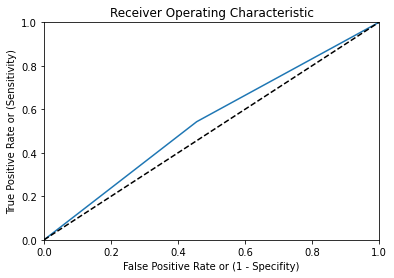

In [ ]:
# SMOTE
# SVM -- SIGMOID
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='sigmoid', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(X_train_new, y_train_new)
y_pred = model.predict(a_stats_valid_x)

evaluate_on_training_set(a_stats_valid_y, y_pred)

#### GridSearch (Without SMOTE)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 59.8min finished


Best parameter set found on development set:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 

AUC is:  0.589284245166598
              precision    recall  f1-score   support

         0.0       0.71      0.96      0.82       884
         1.0       0.75      0.21      0.33       440

    accuracy                           0.72      1324
   macro avg       0.73      0.59      0.58      1324
weighted avg       0.72      0.72      0.66      1324

Confusion Matrix: 
 [[853  31]
 [346  94]]


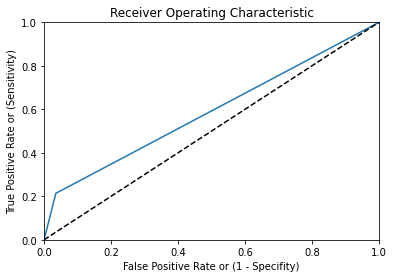

In [ ]:
# Using GridSearch -- WITHOUT SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'],
                     'C': [1, 10, 100]}]

# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='f1', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(a_stats_train_x, a_stats_train_y)

# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)
print(cross_val_score(svc, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.6699840219069151


### Gaussian Naive Bayes

#### Basic (Balanced Class)


AUC is:  0.602807486631016
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75       884
         1.0       0.48      0.44      0.46       440

    accuracy                           0.66      1324
   macro avg       0.61      0.60      0.60      1324
weighted avg       0.65      0.66      0.65      1324

Confusion Matrix: 
 [[676 208]
 [246 194]]


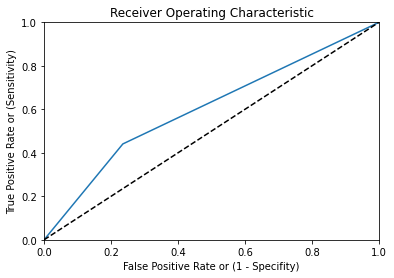

In [ ]:
# GAUSSIAN NAIVE BAYES
# https://stats.stackexchange.com/questions/104397/naive-bayes-imbalanced-dataset-in-real-time-scenario
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(a_stats_train_x, a_stats_train_y) # Training the model

y_pred = nb.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.571837721102427
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       884
         1.0       0.41      0.50      0.45       440

    accuracy                           0.60      1324
   macro avg       0.57      0.57      0.57      1324
weighted avg       0.62      0.60      0.60      1324

Confusion Matrix: 
 [[567 317]
 [219 221]]


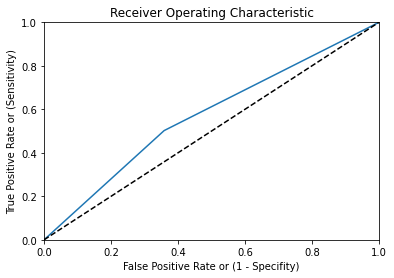

In [ ]:
# SMOTE
# GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(X_train_new, y_train_new) # Training the model

y_pred = nb.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()
print(cross_val_score(nb, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.604535204663509


### Random Forest Classifier

#### Basic (Balanced Class)

AUC is:  0.5932229535170712
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       884
         1.0       0.46      0.45      0.46       440

    accuracy                           0.64      1324
   macro avg       0.59      0.59      0.59      1324
weighted avg       0.64      0.64      0.64      1324

Confusion Matrix: 
 [[647 237]
 [240 200]]


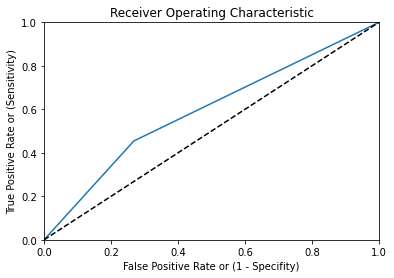

In [ ]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
classifier.fit(a_stats_train_x, a_stats_train_y) # Training the model

y_pred = classifier.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5943490333196215
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       884
         1.0       0.46      0.45      0.46       440

    accuracy                           0.64      1324
   macro avg       0.60      0.59      0.59      1324
weighted avg       0.64      0.64      0.64      1324

Confusion Matrix: 
 [[651 233]
 [241 199]]


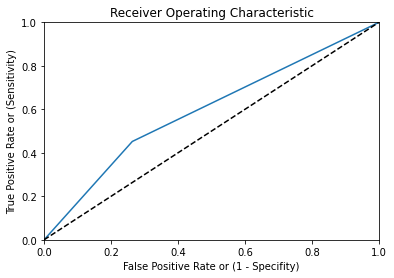

In [ ]:
# RANDOM FOREST CLASSIFIER
# SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_new, y_train_new) # Training the model

y_pred = classifier.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Train a Guassian Naive Bayes classifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
print(cross_val_score(classifier, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.685239840752825


### Gradient Boosting

#### Basic (Balanced Class)

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.00      0.00      0.00       440

    accuracy                           0.67      1324
   macro avg       0.33      0.50      0.40      1324
weighted avg       0.45      0.67      0.53      1324

Confusion Matrix: 
 [[884   0]
 [440   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.00      0.00      0.00       440

    accuracy                           0.67      1324
   macro avg       0.33      0.50      0.40      1324
weighted avg       0.45      0.67      0.53      1324

Confusion Matrix: 
 [[884   0]
 [440   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.00      0.00      0.00       440

    accuracy                           0.67      1324
   macro avg       0.33      0.50      0.40      1324
weighted avg       0.45      0.67      0.53      1324

Confusion Matrix: 
 [[884   0]
 [440   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.530697243932538
              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81       884
         1.0       0.83      0.07      0.13       440

    accuracy                           0.69      1324
   macro avg       0.76      0.53      0.47      1324
weighted avg       0.73      0.69      0.58      1324

Confusion Matrix: 
 [[878   6]
 [410  30]]
AUC is:  0.5546122994652407
              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81       884
         1.0       0.70      0.14      0.23       440

    accuracy                           0.69      1324
   macro avg       0.70      0.55      0.52      1324
weighted avg       0.70      0.69      0.62      1324

Confusion Matrix: 
 [[858  26]
 [379  61]]
AUC is:  0.5756890168654875
              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81       884
         1.0       0.66      0.20      0.31       440

    accuracy 

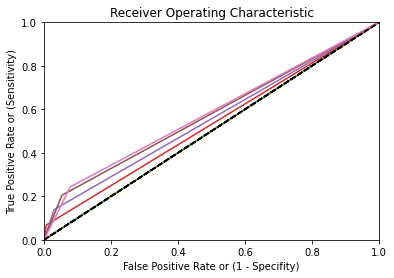

In [ ]:
# GRADIENT BOOSTING -- takes into account imbalanced classes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(a_stats_train_x, a_stats_train_y) 
    y_pred = gbc.predict(a_stats_valid_x)

    evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5548231180584122
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       884
         1.0       0.39      0.48      0.43       440

    accuracy                           0.58      1324
   macro avg       0.55      0.55      0.55      1324
weighted avg       0.60      0.58      0.59      1324

Confusion Matrix: 
 [[555 329]
 [228 212]]
AUC is:  0.5468634306869601
              precision    recall  f1-score   support

         0.0       0.70      0.63      0.66       884
         1.0       0.38      0.46      0.42       440

    accuracy                           0.57      1324
   macro avg       0.54      0.55      0.54      1324
weighted avg       0.60      0.57      0.58      1324

Confusion Matrix: 
 [[557 327]
 [236 204]]
AUC is:  0.5554195804195805
              precision    recall  f1-score   support

         0.0       0.71      0.62      0.66       884
         1.0       0.39      0.50      0.44       440

    accuracy

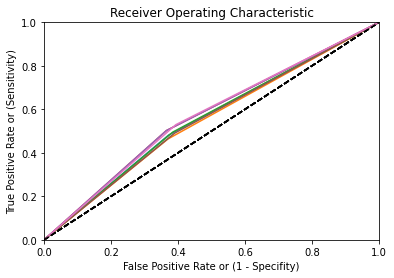

In [ ]:
# GRADIENT BOOSTING
# SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(X_train_new, y_train_new)
    y_pred = gbc.predict(a_stats_valid_x)

    evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    print(cross_val_score(gbc, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.594262423121936
0.5964603350133681
0.5962348378592986
0.6050407593431111
0.5996593296905248
0.606243065240043
0.6103333815317976


### Ada Boosting

#### Basic (Balanced Class)

AUC is:  0.5051162073220897
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.83      0.01      0.02       440

    accuracy                           0.67      1324
   macro avg       0.75      0.51      0.41      1324
weighted avg       0.72      0.67      0.54      1324

Confusion Matrix: 
 [[883   1]
 [435   5]]
AUC is:  0.5125102838338133
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       884
         1.0       0.76      0.03      0.06       440

    accuracy                           0.67      1324
   macro avg       0.72      0.51      0.43      1324
weighted avg       0.70      0.67      0.56      1324

Confusion Matrix: 
 [[880   4]
 [427  13]]
AUC is:  0.5272881530234471
              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81       884
         1.0       0.82      0.06      0.11       440

    accuracy

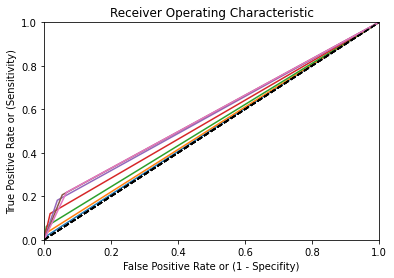

In [ ]:
# ADA BOOSTING --> Can be used to boost the performance of decision trees on binary classification problems.
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(a_stats_train_x, a_stats_train_y) # Training the model

    y_pred = model.predict(a_stats_valid_x)

    evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5804504319210202
              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66       884
         1.0       0.41      0.56      0.47       440

    accuracy                           0.59      1324
   macro avg       0.57      0.58      0.57      1324
weighted avg       0.63      0.59      0.60      1324

Confusion Matrix: 
 [[532 352]
 [194 246]]
AUC is:  0.5855512134923899
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       884
         1.0       0.42      0.56      0.48       440

    accuracy                           0.59      1324
   macro avg       0.58      0.59      0.57      1324
weighted avg       0.63      0.59      0.60      1324

Confusion Matrix: 
 [[537 347]
 [192 248]]
AUC is:  0.5945547099958864
              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       884
         1.0       0.43      0.54      0.48       440

    accuracy

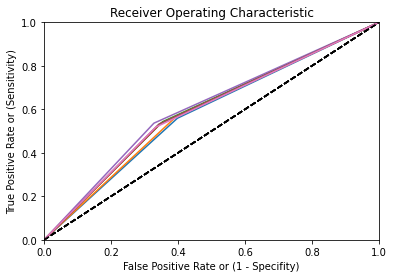

In [ ]:
# ADA BOOSTING --> Can be used to boost the performance of decision trees on binary classification problems.
# SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(X_train_new, y_train_new) # Training the model

    y_pred = model.predict(a_stats_valid_x)

    evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    print(cross_val_score(model, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.5796321870884344
0.5898710045088015
0.5947644116624782
0.6128500103700198
0.6119905628256401
0.6082802955579923
0.6060263865318261


### XGBoost

#### Basic (Balanced Class)

AUC is:  0.5909810777457837
              precision    recall  f1-score   support

         0.0       0.71      0.97      0.82       884
         1.0       0.77      0.21      0.33       440

    accuracy                           0.72      1324
   macro avg       0.74      0.59      0.58      1324
weighted avg       0.73      0.72      0.66      1324

Confusion Matrix: 
 [[856  28]
 [346  94]]


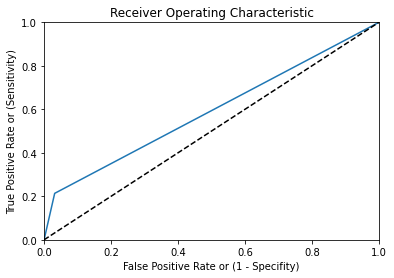

In [ ]:
# XGBOOST -- takes into account imbalanced classes
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_clf = XGBClassifier()
xgb_clf.fit(a_stats_train_x, a_stats_train_y)
y_pred = xgb_clf.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.593947963800905
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       884
         1.0       0.44      0.53      0.48       440

    accuracy                           0.62      1324
   macro avg       0.59      0.59      0.59      1324
weighted avg       0.64      0.62      0.62      1324

Confusion Matrix: 
 [[586 298]
 [209 231]]


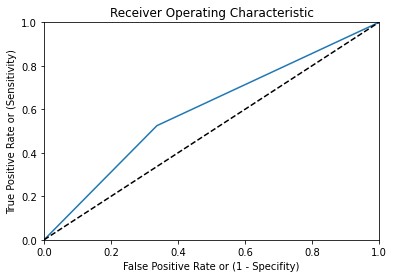

In [ ]:
# XGBOOST
# SMOTE
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_new, y_train_new)
y_pred = xgb_clf.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### GridSearch -- Without SMOTE

Best: -0.596514 using {'learning_rate': 0.1, 'n_estimators': 100}
-0.691621 (0.000070) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.690126 (0.000138) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.688665 (0.000196) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.687232 (0.000251) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.685824 (0.000306) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.679169 (0.000572) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.667600 (0.001084) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.657935 (0.001526) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.649801 (0.001957) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.642925 (0.002346) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.621070 (0.004100) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.605613 (0.006497) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.600264 (0.007948) with: {'learning_rate': 0.01, 'n_e

Text(0, 0.5, 'Log Loss')

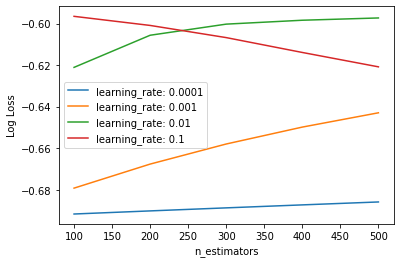

In [ ]:
# GridSearch -- WITHOUT SMOTE
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(a_stats_train_x, a_stats_train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

AUC is:  0.5721976552858906
              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82       884
         1.0       0.83      0.16      0.27       440

    accuracy                           0.71      1324
   macro avg       0.76      0.57      0.54      1324
weighted avg       0.74      0.71      0.64      1324

Confusion Matrix: 
 [[869  15]
 [369  71]]


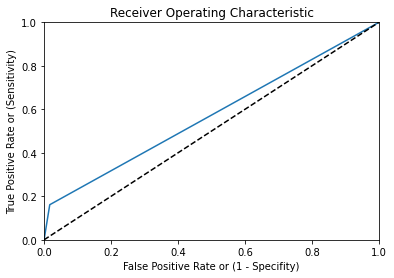

In [ ]:
# {'learning_rate': 0.01, 'n_estimators': 500}
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.01,n_estimators=500)
xgb_clf.fit(a_stats_train_x, a_stats_train_y)
y_pred = xgb_clf.predict(a_stats_valid_x)
evaluate_on_training_set(a_stats_valid_y, y_pred)

#### Cross Validation 

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
print(cross_val_score(xgb_clf, X_train_new_cv, y_train_new_cv, cv=10, scoring='f1_macro').mean())

0.6485474668148703


### Best Model for Stats

Based on the testing on validation data, the best model for level A statistics is SVM Balanced with Radial Basis Function. As such we will be utilising this model on the test data

AUC is:  0.6054435483870968
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       620
         1.0       0.42      0.46      0.44       240

    accuracy                           0.67       860
   macro avg       0.60      0.61      0.60       860
weighted avg       0.68      0.67      0.67       860

Confusion Matrix: 
 [[464 156]
 [129 111]]


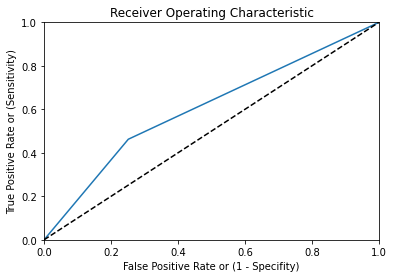

In [ ]:
# SVM with weights -- RBF
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(a_stats_train_x, a_stats_train_y)
y_pred = model.predict(a_stats_test_x)

evaluate_on_training_set(a_stats_test_y, y_pred)

# B

#### SMOTE DATA

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


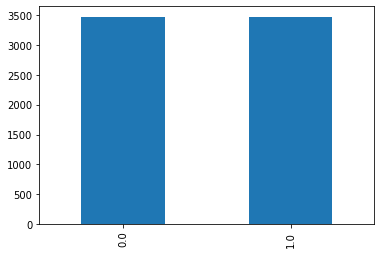

In [ ]:
#SMOTE (create the dataframe with the smote data)
# Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(b_stats_train_x, b_stats_train_y)
X_train_new_b, y_train_new_b = sm.fit_sample(b_cv_train_x, b_cv_train_y)

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

## Stats Models

### Logistic Regression

#### Basic (Balanced Class)

AUC is:  0.5445797329143756
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76       402
         1.0       0.11      0.45      0.17        38

    accuracy                           0.62       440
   macro avg       0.52      0.54      0.46       440
weighted avg       0.85      0.62      0.71       440

Confusion Matrix: 
 [[258 144]
 [ 21  17]]


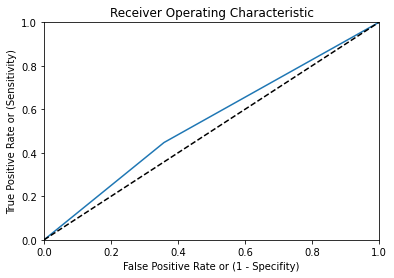

In [ ]:
# Balanced Weights
# LOGISTIC REGRESSION
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=100000, class_weight='balanced')
model.fit(b_stats_train_x, b_stats_train_y)

y_pred = model.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5431395653312386
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       402
         1.0       0.11      0.39      0.17        38

    accuracy                           0.67       440
   macro avg       0.52      0.54      0.48       440
weighted avg       0.85      0.67      0.74       440

Confusion Matrix: 
 [[278 124]
 [ 23  15]]


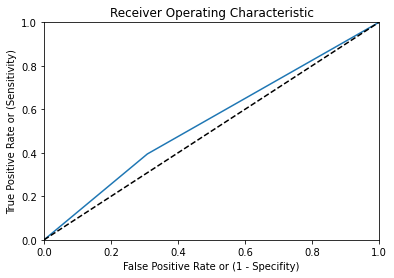

In [ ]:
# SMOTE
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

# fit the model
clf.fit(X_train_new, y_train_new)

y_pred = clf.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### GridSearch (Without SMOTE)

In [ ]:
#GridSearch to find best weights -- WITHOUT SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
grid = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2)

grid.fit(b_stats_train_x, b_stats_train_y)

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Best score: 0.2405190620073101 with param: {'class_weight': {0: 0.09949748743718594, 1: 0.9005025125628141}}


AUC is:  0.5266040688575899
              precision    recall  f1-score   support

         0.0       0.90      0.50      0.64       213
         1.0       0.12      0.56      0.20        27

    accuracy                           0.50       240
   macro avg       0.51      0.53      0.42       240
weighted avg       0.81      0.50      0.59       240

Confusion Matrix: 
 [[106 107]
 [ 12  15]]


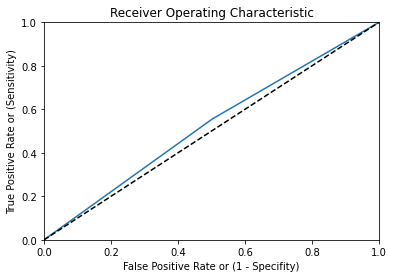

In [ ]:
# Using the manual class weight -- WITHOUT SMOTE
model = LogisticRegression(max_iter=100000, class_weight={0: 0.099, 1:0.900}, solver='newton-cg')
model.fit(b_stats_train_x, b_stats_train_y) # Training the model
y_pred = model.predict(b_stats_test_x) # Predicting labels for our test set using trained model

evaluate_on_training_set(b_stats_test_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
print(cross_val_score(logreg, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6856100427326879


### SVM

#### Basic (Balanced Class)

AUC is:  0.5445797329143756
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76       402
         1.0       0.11      0.45      0.17        38

    accuracy                           0.62       440
   macro avg       0.52      0.54      0.46       440
weighted avg       0.85      0.62      0.71       440

Confusion Matrix: 
 [[258 144]
 [ 21  17]]


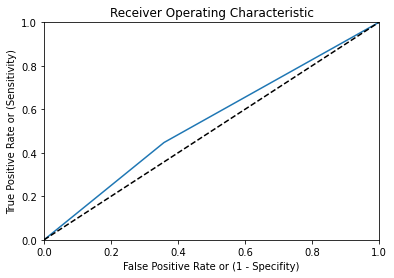

In [ ]:
# SVM with weights -- LINEAR
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='linear', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(b_stats_train_x, b_stats_train_y)
y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.5496857816182248
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85       402
         1.0       0.12      0.32      0.18        38

    accuracy                           0.74       440
   macro avg       0.52      0.55      0.51       440
weighted avg       0.85      0.74      0.79       440

Confusion Matrix: 
 [[315  87]
 [ 26  12]]


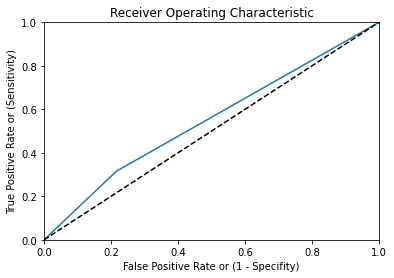

In [ ]:
# SVM with weights -- RBF
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(b_stats_train_x, b_stats_train_y)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.54719821942917
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84       402
         1.0       0.12      0.32      0.17        38

    accuracy                           0.74       440
   macro avg       0.52      0.55      0.51       440
weighted avg       0.85      0.74      0.79       440

Confusion Matrix: 
 [[313  89]
 [ 26  12]]


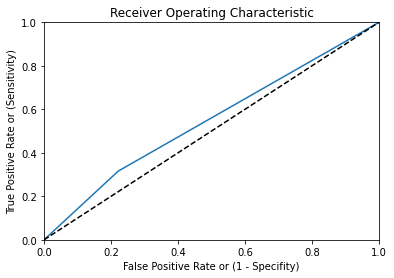

In [ ]:
# SVM with weights -- POLY
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='poly', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(b_stats_train_x, b_stats_train_y)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.5174129353233831
              precision    recall  f1-score   support

         0.0       0.92      0.53      0.68       402
         1.0       0.09      0.50      0.16        38

    accuracy                           0.53       440
   macro avg       0.51      0.52      0.42       440
weighted avg       0.85      0.53      0.63       440

Confusion Matrix: 
 [[215 187]
 [ 19  19]]


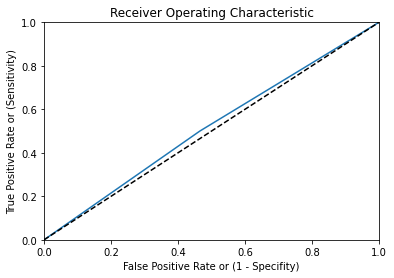

In [ ]:
# SVM with weights -- SIGMOID
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, kernel='sigmoid', class_weight='balanced', random_state=0)

svc.fit(b_stats_train_x, b_stats_train_y)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5401283058392249
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77       402
         1.0       0.10      0.42      0.17        38

    accuracy                           0.64       440
   macro avg       0.51      0.54      0.47       440
weighted avg       0.85      0.64      0.72       440

Confusion Matrix: 
 [[265 137]
 [ 22  16]]


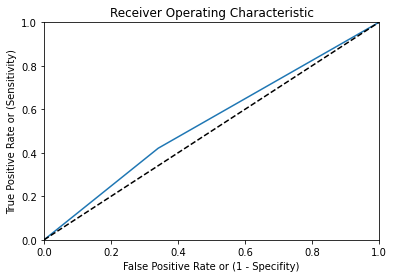

In [ ]:
# SMOTE
# SVM -- LINEAR
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.566575019638649
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85       402
         1.0       0.13      0.34      0.19        38

    accuracy                           0.75       440
   macro avg       0.53      0.57      0.52       440
weighted avg       0.86      0.75      0.80       440

Confusion Matrix: 
 [[318  84]
 [ 25  13]]


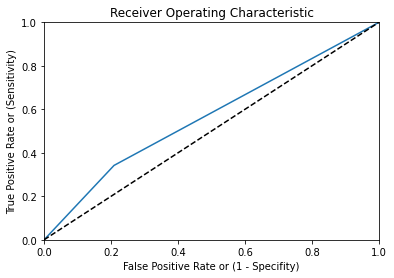

In [ ]:
# SMOTE
# SVM -- RBF
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.5242864624247185
              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80       402
         1.0       0.10      0.34      0.15        38

    accuracy                           0.68       440
   macro avg       0.51      0.52      0.48       440
weighted avg       0.85      0.68      0.74       440

Confusion Matrix: 
 [[284 118]
 [ 25  13]]


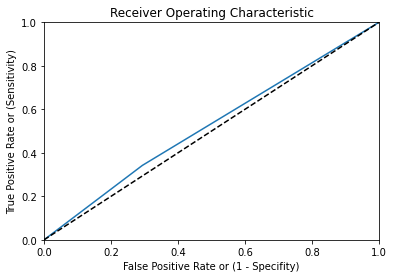

In [ ]:
# SMOTE
# SVM -- POLY
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='poly', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

AUC is:  0.5343021733438073
              precision    recall  f1-score   support

         0.0       0.92      0.54      0.68       402
         1.0       0.10      0.53      0.17        38

    accuracy                           0.54       440
   macro avg       0.51      0.53      0.42       440
weighted avg       0.85      0.54      0.64       440

Confusion Matrix: 
 [[218 184]
 [ 18  20]]


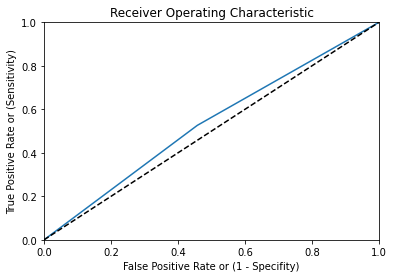

In [ ]:
# SMOTE
# SVM -- SIGMOID
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='sigmoid', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)

y_pred = svc.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### GridSearch (Without SMOTE)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 32.7min finished


Best parameter set found on development set:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} 

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


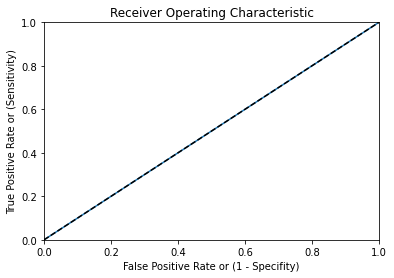

In [ ]:
# Using GridSearch -- WITHOUT SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100]},
                    {'kernel': ['linear'],
                     'C': [1, 10, 100]}]

# we define the grid search model for SVM: 
clf = GridSearchCV(SVC(), tuned_parameters, cv=2,
                   scoring='f1', verbose=1, n_jobs=4)

# train the model on the training set: 
clf.fit(b_stats_train_x, b_stats_train_y)

# Show best parameters: 
print("Best parameter set found on development set:")
print(clf.best_params_, '\n')

y_pred = clf.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='poly', random_state=0)
print(cross_val_score(svc, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.8021447565757983


### Gaussian Naive Bayes

#### Basic (Balanced Class)


AUC is:  0.5578685519769573
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       402
         1.0       0.12      0.34      0.18        38

    accuracy                           0.74       440
   macro avg       0.53      0.56      0.51       440
weighted avg       0.86      0.74      0.79       440

Confusion Matrix: 
 [[311  91]
 [ 25  13]]


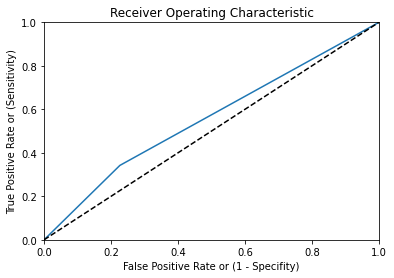

In [ ]:
# GAUSSIAN NAIVE BAYES
# https://stats.stackexchange.com/questions/104397/naive-bayes-imbalanced-dataset-in-real-time-scenario
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(b_stats_train_x, b_stats_train_y) # Training the model

y_pred = nb.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5587850222571353
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80       402
         1.0       0.12      0.42      0.18        38

    accuracy                           0.67       440
   macro avg       0.52      0.56      0.49       440
weighted avg       0.86      0.67      0.74       440

Confusion Matrix: 
 [[280 122]
 [ 22  16]]


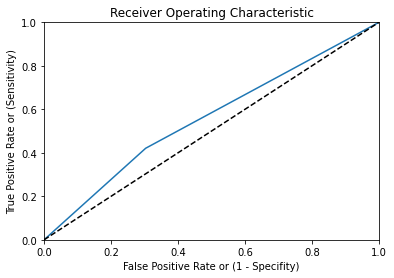

In [ ]:
# SMOTE
# GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(X_train_new, y_train_new) # Training the model

y_pred = nb.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
print(cross_val_score(nb, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.6887000893535452


### Random Forest Classifier

#### Basic (Balanced Class)

AUC is:  0.5638910709609846
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       402
         1.0       0.14      0.29      0.19        38

    accuracy                           0.79       440
   macro avg       0.54      0.56      0.54       440
weighted avg       0.86      0.79      0.82       440

Confusion Matrix: 
 [[337  65]
 [ 27  11]]


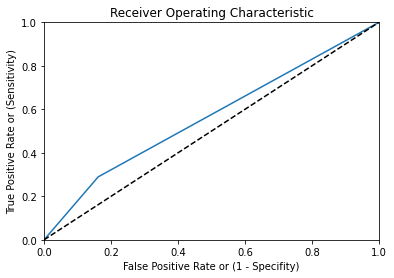

In [ ]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
classifier.fit(b_stats_train_x, b_stats_train_y) # Training the model

y_pred = classifier.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5612071222833203
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       402
         1.0       0.16      0.24      0.19        38

    accuracy                           0.83       440
   macro avg       0.54      0.56      0.55       440
weighted avg       0.86      0.83      0.84       440

Confusion Matrix: 
 [[356  46]
 [ 29   9]]


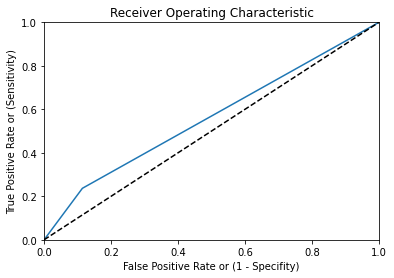

In [ ]:
# RANDOM FOREST CLASSIFIER
# SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_new, y_train_new) # Training the model

y_pred = classifier.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
print(cross_val_score(classifier, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.8685239927708963


### Gradient Boosting

#### Basic (Balanced Class)

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]
AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]
AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.4987562189054726
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[401   1]
 [ 38   0]]
AUC is:  0.4987562189054726
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[401   1]
 [ 38   0]]
AUC is:  0.49502487562189057
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       402
         1.0       0.00      0.00      0.00        38

    accurac

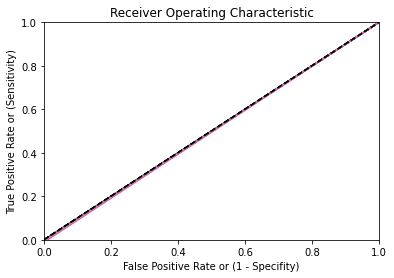

In [ ]:
# GRADIENT BOOSTING -- takes into account imbalanced classes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(b_stats_train_x, b_stats_train_y) 
    y_pred = gbc.predict(b_stats_valid_x)
    evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.4926682377585756
              precision    recall  f1-score   support

         0.0       0.91      0.62      0.74       402
         1.0       0.08      0.37      0.14        38

    accuracy                           0.60       440
   macro avg       0.50      0.49      0.44       440
weighted avg       0.84      0.60      0.68       440

Confusion Matrix: 
 [[248 154]
 [ 24  14]]
AUC is:  0.5120450379680546
              precision    recall  f1-score   support

         0.0       0.92      0.63      0.75       402
         1.0       0.09      0.39      0.15        38

    accuracy                           0.61       440
   macro avg       0.50      0.51      0.45       440
weighted avg       0.85      0.61      0.69       440

Confusion Matrix: 
 [[253 149]
 [ 23  15]]
AUC is:  0.48821681068342493
              precision    recall  f1-score   support

         0.0       0.91      0.63      0.75       402
         1.0       0.08      0.34      0.13        38

    accurac

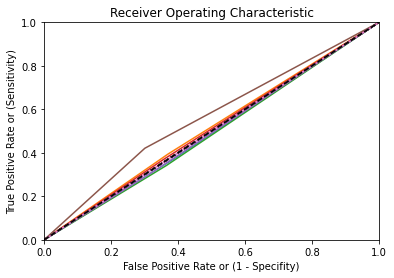

In [ ]:
# GRADIENT BOOSTING
# SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(X_train_new, y_train_new)
    
    y_pred = gbc.predict(b_stats_valid_x)
    evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)

    print(cross_val_score(gbc, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.6791084902821172
0.6842356277389547
0.692257030578908
0.7052585410739198
0.7114865306100085
0.7162715368241473
0.7163920285103249


### Ada Boosting

#### Basic (Balanced Class)

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


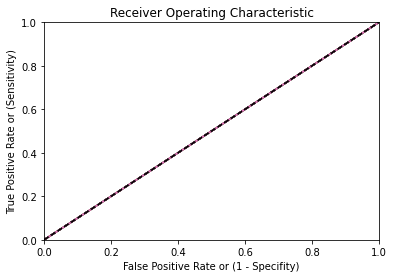

In [ ]:
# ADA BOOSTING --> Can be used to boost the performance of decision trees on binary classification problems.
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(b_stats_train_x, b_stats_train_y) # Training the model

    y_pred = model.predict(b_stats_valid_x)
    evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5879811468970935
              precision    recall  f1-score   support

         0.0       0.94      0.60      0.73       402
         1.0       0.12      0.58      0.20        38

    accuracy                           0.60       440
   macro avg       0.53      0.59      0.46       440
weighted avg       0.87      0.60      0.68       440

Confusion Matrix: 
 [[240 162]
 [ 16  22]]
AUC is:  0.5803220738413196
              precision    recall  f1-score   support

         0.0       0.93      0.63      0.76       402
         1.0       0.12      0.53      0.20        38

    accuracy                           0.62       440
   macro avg       0.53      0.58      0.48       440
weighted avg       0.86      0.62      0.71       440

Confusion Matrix: 
 [[255 147]
 [ 18  20]]
AUC is:  0.5783582089552238
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77       402
         1.0       0.12      0.50      0.19        38

    accuracy

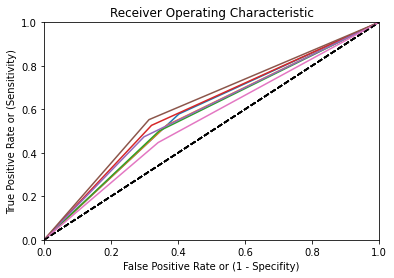

In [ ]:
# ADA BOOSTING --> Can be used to boost the performance of decision trees on binary classification problems.
# SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(X_train_new, y_train_new) # Training the model

    y_pred = model.predict(b_stats_valid_x)
    evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation for Gradient Boosting using SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate)

    print(cross_val_score(model, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.6550278167601898
0.6723958222907103
0.6831197594766204
0.7086807407856794
0.7161804148058432
0.7170963063466754
0.7121528632928291


### XGBoost

#### Basic (Balanced Class)

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


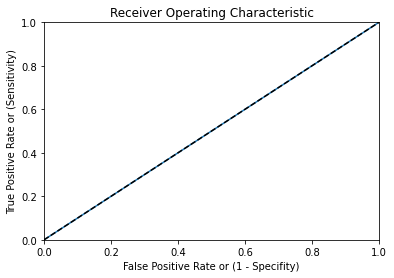

In [ ]:
# XGBOOST -- takes into account imbalanced classes
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_clf = XGBClassifier()
xgb_clf.fit(b_stats_train_x, b_stats_train_y)

y_pred = xgb_clf.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### SMOTE

AUC is:  0.5690625818277036
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       402
         1.0       0.14      0.34      0.20        38

    accuracy                           0.76       440
   macro avg       0.53      0.57      0.53       440
weighted avg       0.86      0.76      0.80       440

Confusion Matrix: 
 [[320  82]
 [ 25  13]]


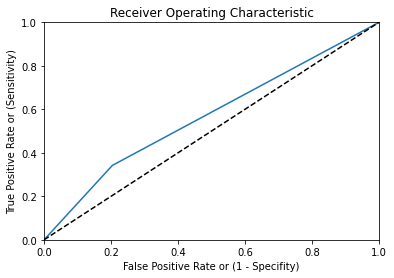

In [ ]:
# XGBOOST
# SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_new, y_train_new)

y_pred = xgb_clf.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### GridSearch -- Without SMOTE

In [ ]:
# GridSearch -- WITHOUT SMOTE
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(b_stats_train_x, b_stats_train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

AUC is:  0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       402
         1.0       0.00      0.00      0.00        38

    accuracy                           0.91       440
   macro avg       0.46      0.50      0.48       440
weighted avg       0.83      0.91      0.87       440

Confusion Matrix: 
 [[402   0]
 [ 38   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


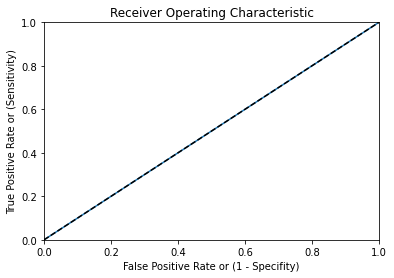

In [ ]:
# {'learning_rate': 0.01, 'n_estimators': 500}
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.01,n_estimators=500)
xgb_clf.fit(b_stats_train_x, b_stats_train_y)

y_pred = xgb_clf.predict(b_stats_valid_x)
evaluate_on_training_set(b_stats_valid_y, y_pred)

#### Cross Validation

In [ ]:
# k-fold cross validation for Gradient Boosting using SMOTE
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb_clf = XGBClassifier(learning_rate=learning_rate,n_estimators=500)

    print(cross_val_score(xgb_clf, X_train_new_b, y_train_new_b, cv=10, scoring='f1_macro').mean())

0.8362110011572679
0.846431377090811
0.8517018654022719
0.8659580095395812
0.8636649280507702
0.8633505192044988
0.8662728869952465


# C

### SMOTE DATA

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

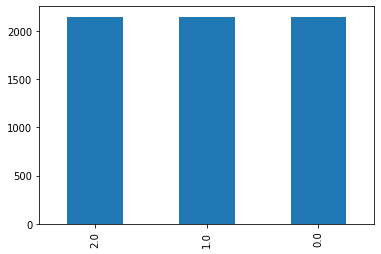

In [ ]:
#SMOTE (create the dataframe with the smote data)
# Using SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

X_train_new, y_train_new = sm.fit_sample(c_stats_train_x, c_stats_train_y)
X_train_new_c, y_train_new_c = sm.fit_sample(c_cv_train_x, c_cv_train_y)

# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

## Stats Models

### Evaluation function for multiclass

In [ ]:
# calculate AUC score by binarizing labels in a one-vs-all fashion
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

### Logistic Regression

#### Basic (Balanced Class)

In [ ]:
# LOGISTIC REGRESSION
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=100000, class_weight='balanced', multi_class='ovr')
model.fit(c_stats_train_x, c_stats_train_y)
y_pred = model.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.47164948453608246

Classification Report

               precision    recall  f1-score   support

         0.0       0.33      0.38      0.35        97
         1.0       0.75      0.51      0.60       261
         2.0       0.14      0.47      0.22        30

    accuracy                           0.47       388
   macro avg       0.41      0.45      0.39       388
weighted avg       0.59      0.47      0.51       388

AUC score:0.5839535211704997


#### SMOTE

In [ ]:
# https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=100000, multi_class='ovr')

# fit model
clf.fit(X_train_new, y_train_new)
y_pred = clf.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.422680412371134

Classification Report

               precision    recall  f1-score   support

         0.0       0.28      0.34      0.31        97
         1.0       0.72      0.45      0.55       261
         2.0       0.12      0.43      0.19        30

    accuracy                           0.42       388
   macro avg       0.37      0.41      0.35       388
weighted avg       0.56      0.42      0.46       388

AUC score:0.5509742447090269


#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
print(cross_val_score(logreg, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.50291843830744


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### SVM

#### Basic (Balanced Class)

In [ ]:
# SVM -- LINEAR
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, decision_function_shape='ovo',kernel='linear', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(c_stats_train_x, c_stats_train_y)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.3865979381443299

Classification Report

               precision    recall  f1-score   support

         0.0       0.28      0.40      0.33        97
         1.0       0.73      0.37      0.49       261
         2.0       0.12      0.47      0.19        30

    accuracy                           0.39       388
   macro avg       0.38      0.41      0.34       388
weighted avg       0.57      0.39      0.43       388

AUC score:0.5557866053164275


In [ ]:
# SVM -- RBF
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# Create support vector classifier
svc = SVC(C=1000, decision_function_shape='ovo', kernel='rbf', class_weight='balanced', random_state=0)

# Train classifier
model = svc.fit(c_stats_train_x, c_stats_train_y)
y_pred = model.predict(c_stats_test_x)

classification_report = classification_report(c_stats_test_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_test_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_test_y, y_pred)}")


 Accuracy:  0.45539906103286387

Classification Report

               precision    recall  f1-score   support

         0.0       0.50      0.41      0.45        78
         1.0       0.55      0.59      0.57       100
         2.0       0.15      0.17      0.16        35

    accuracy                           0.46       213
   macro avg       0.40      0.39      0.39       213
weighted avg       0.46      0.46      0.46       213

AUC score:0.5507317354301212


In [ ]:
# SVM -- POLY
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, decision_function_shape='ovo', kernel='poly', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(c_stats_train_x, c_stats_train_y)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5180412371134021

Classification Report

               precision    recall  f1-score   support

         0.0       0.32      0.36      0.34        97
         1.0       0.73      0.61      0.66       261
         2.0       0.13      0.27      0.17        30

    accuracy                           0.52       388
   macro avg       0.39      0.41      0.39       388
weighted avg       0.58      0.52      0.54       388

AUC score:0.5606330121716281


In [ ]:
# SVM -- SIGMOID
# https://chrisalbon.com/machine_learning/support_vector_machines/imbalanced_classes_in_svm/

from sklearn.metrics import accuracy_score, classification_report
# Create support vector classifier
svc = SVC(C=10, decision_function_shape='ovo', kernel='sigmoid', class_weight='balanced', random_state=0)

# Train classifier
svc.fit(c_stats_train_x, c_stats_train_y)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.24742268041237114

Classification Report

               precision    recall  f1-score   support

         0.0       0.24      0.44      0.32        97
         1.0       0.71      0.17      0.28       261
         2.0       0.05      0.27      0.09        30

    accuracy                           0.25       388
   macro avg       0.34      0.29      0.23       388
weighted avg       0.55      0.25      0.27       388

AUC score:0.4816246205391404


#### SMOTE

In [ ]:
# SMOTE
# SVM --> LINEAR
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='linear', decision_function_shape='ovo', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)

y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.38917525773195877

Classification Report

               precision    recall  f1-score   support

         0.0       0.28      0.39      0.33        97
         1.0       0.72      0.38      0.50       261
         2.0       0.12      0.43      0.18        30

    accuracy                           0.39       388
   macro avg       0.37      0.40      0.34       388
weighted avg       0.56      0.39      0.43       388

AUC score:0.5475069484238467


In [ ]:
# SMOTE
# SVM --> RBF
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='rbf', decision_function_shape='ovo', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5721649484536082

Classification Report

               precision    recall  f1-score   support

         0.0       0.35      0.36      0.36        97
         1.0       0.75      0.68      0.71       261
         2.0       0.19      0.33      0.24        30

    accuracy                           0.57       388
   macro avg       0.43      0.46      0.44       388
weighted avg       0.61      0.57      0.59       388

AUC score:0.5946181771144179


In [ ]:
# SMOTE
# SVM --> POLY
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='poly', decision_function_shape='ovo', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5103092783505154

Classification Report

               precision    recall  f1-score   support

         0.0       0.31      0.36      0.33        97
         1.0       0.74      0.59      0.66       261
         2.0       0.14      0.30      0.19        30

    accuracy                           0.51       388
   macro avg       0.39      0.42      0.39       388
weighted avg       0.58      0.51      0.54       388

AUC score:0.5650888460156968


In [ ]:
# SMOTE
# SVM --> SIGMOID
from sklearn.metrics import accuracy_score, classification_report

# Create support vector classifier
svc = SVC(kernel='sigmoid', decision_function_shape='ovo', random_state=0)

# Train classifier
svc.fit(X_train_new, y_train_new)
y_pred = svc.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.2551546391752577

Classification Report

               precision    recall  f1-score   support

         0.0       0.22      0.35      0.27        97
         1.0       0.73      0.21      0.32       261
         2.0       0.07      0.37      0.12        30

    accuracy                           0.26       388
   macro avg       0.34      0.31      0.24       388
weighted avg       0.55      0.26      0.29       388

AUC score:0.4897782076726833


#### Cross Validation

In [ ]:
# k-fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(kernel='rbf', decision_function_shape='ovo', random_state=0)
print(cross_val_score(svc, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.6474435341584129


### Gaussian Naive Bayes

#### Basic (Balanced Class)

In [ ]:
# Basic
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(c_stats_train_x, c_stats_train_y)
y_pred = nb.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5773195876288659

Classification Report

               precision    recall  f1-score   support

         0.0       0.34      0.24      0.28        97
         1.0       0.72      0.74      0.73       261
         2.0       0.14      0.23      0.18        30

    accuracy                           0.58       388
   macro avg       0.40      0.40      0.39       388
weighted avg       0.58      0.58      0.57       388

AUC score:0.5560213434948972


#### SMOTE

In [ ]:
# SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Guassian Naive Bayes classifier
nb = GaussianNB()

nb.fit(X_train_new, y_train_new) # Training the model

y_pred = nb.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5283505154639175

Classification Report

               precision    recall  f1-score   support

         0.0       0.35      0.25      0.29        97
         1.0       0.73      0.64      0.68       261
         2.0       0.16      0.50      0.24        30

    accuracy                           0.53       388
   macro avg       0.41      0.46      0.40       388
weighted avg       0.59      0.53      0.55       388

AUC score:0.5897467984951968


#### Cross Validation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
print(cross_val_score(nb, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.4883521501336114


### Random Forest Classifier

#### Basic (Balanced Class)

In [ ]:
# RANDOM FOREST CLASSIFIER --> multiclass classification already implemented in formula
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
classifier.fit(c_stats_train_x, c_stats_train_y)

y_pred = classifier.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5670103092783505

Classification Report

               precision    recall  f1-score   support

         0.0       0.36      0.31      0.33        97
         1.0       0.72      0.70      0.71       261
         2.0       0.12      0.20      0.15        30

    accuracy                           0.57       388
   macro avg       0.40      0.40      0.40       388
weighted avg       0.59      0.57      0.58       388

AUC score:0.5591010088038163


#### SMOTE

In [ ]:
# RANDOM FOREST CLASSIFIER --> multiclass classification already implemented in formula
# SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_new, y_train_new) # Training the model

y_pred = classifier.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5592783505154639

Classification Report

               precision    recall  f1-score   support

         0.0       0.31      0.26      0.28        97
         1.0       0.71      0.72      0.71       261
         2.0       0.11      0.17      0.13        30

    accuracy                           0.56       388
   macro avg       0.38      0.38      0.38       388
weighted avg       0.57      0.56      0.56       388

AUC score:0.5402855407271775


#### Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
print(cross_val_score(classifier, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.6995729207072349


### Gradient Boosting

#### Basic (Balanced Class)

In [ ]:
# GRADIENT BOOSTING --> multiclass classification already implemented in formula
# Plotting learning rates
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    from sklearn.metrics import accuracy_score, classification_report
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(c_stats_train_x, c_stats_train_y)

    y_pred = gbc.predict(c_stats_valid_x)

    classification_report = classification_report(c_stats_valid_y, y_pred)

    print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report)

    print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5

 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5

 Accuracy:  0.6829896907216495

Classification Report

               precision    recall  f1-s

#### SMOTE

In [ ]:
# SMOTE
# GRADIENT BOOSTING --> multiclass classification already implemented in formula
# Plotting learning rates
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    from sklearn.metrics import accuracy_score, classification_report
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbc.fit(X_train_new, y_train_new)

    y_pred = gbc.predict(c_stats_valid_x)

    classification_report = classification_report(c_stats_valid_y, y_pred)

    print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report)

    print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5103092783505154

Classification Report

               precision    recall  f1-score   support

         0.0       0.33      0.34      0.34        97
         1.0       0.74      0.59      0.65       261
         2.0       0.15      0.40      0.22        30

    accuracy                           0.51       388
   macro avg       0.41      0.44      0.40       388
weighted avg       0.59      0.51      0.54       388

AUC score:0.5797063752882096

 Accuracy:  0.5077319587628866

Classification Report

               precision    recall  f1-score   support

         0.0       0.32      0.33      0.32        97
         1.0       0.74      0.59      0.66       261
         2.0       0.15      0.40      0.22        30

    accuracy                           0.51       388
   macro avg       0.40      0.44      0.40       388
weighted avg       0.59      0.51      0.54       388

AUC score:0.578155022815516

 Accuracy:  0.5180412371134021

Classification Report

           

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    print(cross_val_score(gbc, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.5139743065827661
0.5119865723540123
0.513464468040003
0.5190061138942592
0.539706445479861
0.545604099198896
0.5427243576280938


### Ada Boosting

#### Basic (Balanced Class)

In [ ]:
# ADA BOOSTING --> multiclass classification already implemented in formula

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    from sklearn.metrics import accuracy_score, classification_report
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(c_stats_train_x, c_stats_train_y)

    y_pred = model.predict(c_stats_valid_x)

    classification_report = classification_report(c_stats_valid_y, y_pred)

    print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report)

    print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6726804123711341

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6701030927835051

Classification Report

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.67      1.00      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.67       388
   macro avg       0.22      0.33      0.27       388
weighted avg       0.45      0.67      0.54       388

AUC score:0.4987886927097734


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Accuracy:  0.6649484536082474

Classification Report

               precision    recall  f1-score   support

         0.0       0.25      0.03      0.06        97
         1.0       0.68      0.98      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.66       388
   macro avg       0.31      0.34      0.29       388
weighted avg       0.52      0.66      0.55       388

AUC score:0.5040425981235104

 Accuracy:  0.6417525773195877

Classification Report

               precision    recall  f1-score   support

         0.0       0.29      0.07      0.12        97
         1.0       0.68      0.92      0.78       261
         2.0       0.14      0.03      0.05        30

    accuracy                           0.64       388
   macro avg       0.37      0.34      0.32       388
weighted avg       0.54      0.64      0.56       388

AUC score:0.5067175136670499


#### SMOTE

In [ ]:
# SMOTE
# ADA BOOSTING --> multiclass classification already implemented in formula

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    from sklearn.metrics import accuracy_score, classification_report
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    model.fit(X_train_new, y_train_new) # Training the model

    y_pred = model.predict(c_stats_valid_x)

    classification_report = classification_report(c_stats_valid_y, y_pred)

    print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report)

    print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.422680412371134

Classification Report

               precision    recall  f1-score   support

         0.0       0.26      0.24      0.25        97
         1.0       0.72      0.51      0.59       261
         2.0       0.08      0.30      0.12        30

    accuracy                           0.42       388
   macro avg       0.35      0.35      0.32       388
weighted avg       0.56      0.42      0.47       388

AUC score:0.5192664866789075

 Accuracy:  0.4175257731958763

Classification Report

               precision    recall  f1-score   support

         0.0       0.24      0.24      0.24        97
         1.0       0.73      0.51      0.60       261
         2.0       0.06      0.23      0.10        30

    accuracy                           0.42       388
   macro avg       0.34      0.33      0.31       388
weighted avg       0.56      0.42      0.47       388

AUC score:0.5081675317255214

 Accuracy:  0.43556701030927836

Classification Report

          

#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model = AdaBoostClassifier(n_estimators=30, learning_rate=learning_rate) 
    print(cross_val_score(model, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.4149234327098686
0.434943733447635
0.44275593047139983
0.46569707474830074
0.4698023815722875
0.48484372078027516
0.4770801666480443


### XGBoost

#### Basic (Balanced Class)

In [ ]:
# BASIC
# XGBOOST --> multiclass classification already implemented in formula
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_clf = XGBClassifier()

xgb_clf.fit(c_stats_train_x, c_stats_train_y)

y_pred = xgb_clf.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.6752577319587629

Classification Report

               precision    recall  f1-score   support

         0.0       0.50      0.20      0.28        97
         1.0       0.69      0.93      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.68       388
   macro avg       0.40      0.38      0.36       388
weighted avg       0.59      0.68      0.61       388

AUC score:0.5365164983598522


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SMOTE

In [ ]:
# SMOTE
# XGBOOST --> multiclass classification already implemented in formula
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_new, y_train_new)

y_pred = xgb_clf.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.5128865979381443

Classification Report

               precision    recall  f1-score   support

         0.0       0.29      0.30      0.29        97
         1.0       0.74      0.61      0.67       261
         2.0       0.15      0.37      0.22        30

    accuracy                           0.51       388
   macro avg       0.39      0.42      0.39       388
weighted avg       0.58      0.51      0.54       388

AUC score:0.5693454195626361


#### GridSearch -- Without SMOTE

Best: -0.878968 using {'learning_rate': 0.01, 'n_estimators': 400}
-1.095425 (0.000065) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-1.092288 (0.000133) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-1.089201 (0.000198) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-1.086167 (0.000262) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.083179 (0.000321) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.068911 (0.000656) with: {'learning_rate': 0.001, 'n_estimators': 100}
-1.043608 (0.001272) with: {'learning_rate': 0.001, 'n_estimators': 200}
-1.021881 (0.001815) with: {'learning_rate': 0.001, 'n_estimators': 300}
-1.003270 (0.002354) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.987171 (0.002816) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.932324 (0.004511) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.891236 (0.007901) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.881188 (0.010845) with: {'learning_rate': 0.01, 'n_

Text(0, 0.5, 'Log Loss')

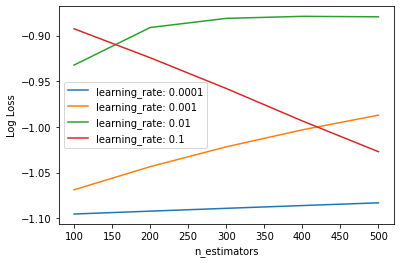

In [ ]:
# GridSearch -- without SMOTE
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(c_stats_train_x, c_stats_train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

In [ ]:
# using {'learning_rate': 0.01, 'n_estimators': 400}
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.01,n_estimators=400)
xgb_clf.fit(c_stats_train_x, c_stats_train_y)

y_pred = xgb_clf.predict(c_stats_valid_x)

classification_report = classification_report(c_stats_valid_y, y_pred)

print('\n Accuracy: ', accuracy_score(c_stats_valid_y, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

print(f"AUC score:{multiclass_roc_auc_score(c_stats_valid_y, y_pred)}")


 Accuracy:  0.6752577319587629

Classification Report

               precision    recall  f1-score   support

         0.0       0.52      0.11      0.19        97
         1.0       0.68      0.96      0.80       261
         2.0       0.00      0.00      0.00        30

    accuracy                           0.68       388
   macro avg       0.40      0.36      0.33       388
weighted avg       0.59      0.68      0.58       388

AUC score:0.5212229662784035


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb_clf = XGBClassifier(learning_rate=learning_rate,n_estimators=500)
    print(cross_val_score(xgb_clf, X_train_new_c, y_train_new_c, cv=10, scoring='f1_macro').mean())

0.6456824663039631
0.65814718081434
0.6612151906107157
0.678892695834542
0.6820573209622096
0.6815674126056578
0.6819107857658714
